In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d 
from matplotlib import cbook
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Lecture des spectres théoriques de Iachello et Kotila

Xm = np.loadtxt("136Xe_hsd_sums.txt")
Ym = np.loadtxt("136Xe_ssd_sums.txt")

In [3]:
n = len(Xm)-2

Esumhsd = np.zeros(n+1)
hsd = np.zeros(n+1)

Esumssd = np.zeros(n+1)
ssd = np.zeros(n+1)

ratiocp = np.zeros(n+1)

## Définition d'une fonction de normalisation d'un tableau de données

def norm(data,xmin,xmax):
    return (data)*len(data)/(np.sum(data)*(xmax-xmin))

## Création des listes de valeurs d'énergies en keV et des taux de comptage pour chaque approximation

for i in range(n+1):
    hsd[i] = Xm[i][2]
    Esumhsd[i] = Xm[i][1] * 1000
    ssd[i] = Ym[i][2]
    Esumssd[i] = Ym[i][1] * 1000

## Normalisation des listes des taux de comptage

normhsd = norm(hsd,Esumhsd[0],Esumhsd[-1]) 
normssd = norm(ssd,Esumhsd[0],Esumhsd[-1]) 

Tout d'abord, il faut créer des "réceptacles" pour y stocker les "tree" contenant toutes les données.

In [4]:
fileHSD = uproot.open("./proc/events_HSD_100000_Proc.root") # lecture des fichiers 
fileSSD = uproot.open("./proc/events_SSD_100000_Proc.root")

#fileHSD.classnames()
#fileSSD.classnames()

treeHSD1 = fileHSD["events;1"] # stockage de la branche utile 
treeSSD1 = fileSSD["events;1"]
#treeHSD2 = fileHSD["events;10"]
#treeSSD2 = fileSSD["events;10"]

#treeHSD1.show()
#treeSSD1.show()



La prochaine étape est de créer des listes de données intéressantes à partir des "tree" obtenus précédemment.

In [5]:
## Obtention des positions initiales et tout le parcours pour les deux approximations

xp_priHSD1 = treeHSD1["xpri"].array(library="pd")
yp_priHSD1 = treeHSD1["ypri"].array(library="pd")
zp_priHSD1 = treeHSD1["zpri"].array(library="pd")

xpHSD1 = treeHSD1["Xp"].array(library="pd")
ypHSD1 = treeHSD1["Yp"].array(library="pd")
zpHSD1 = treeHSD1["Zp"].array(library="pd")


xp_priSSD1 = treeSSD1["xpri"].array(library="pd")
yp_priSSD1 = treeSSD1["ypri"].array(library="pd")
zp_priSSD1 = treeSSD1["zpri"].array(library="pd")

xpSSD1 = treeSSD1["Xp"].array(library="pd")
ypSSD1 = treeSSD1["Yp"].array(library="pd")
zpSSD1 = treeSSD1["Zp"].array(library="pd")

In [6]:
#print(xpHSD1[0][0])
#print(xpHSD1)

Energies

In [7]:
## Obtention des énergies initiales et totales

testHSD11 = treeHSD1["epri"].array(library="pd")
testHSD12 = treeHSD1["Etot"].array(library="pd")


testSSD11 = treeSSD1["epri"].array(library="pd")
testSSD12 = treeSSD1["Etot"].array(library="pd")

/tmp/jobs/21806874/ipykernel_521/1847815078.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


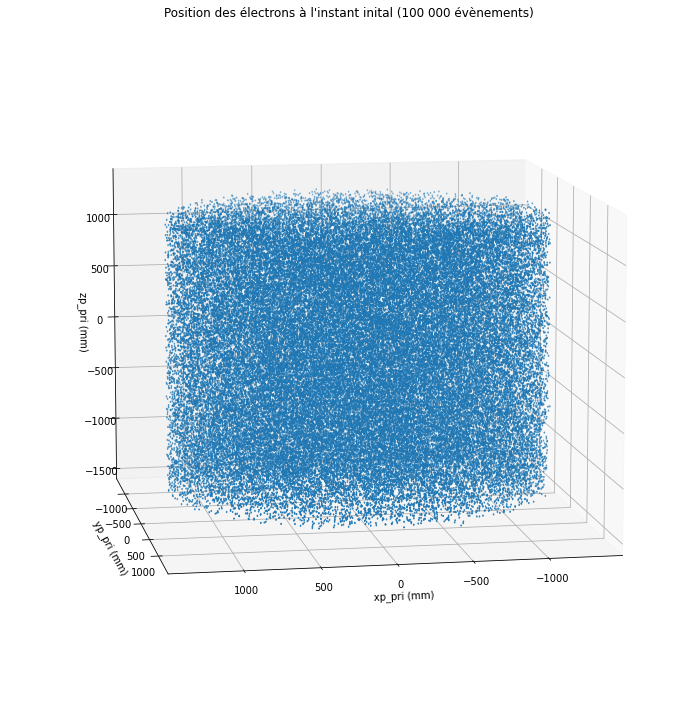

In [8]:
## Représentation en 3D des positions initiales des électrons simulés dans un cylindre de hauteur 3m et de rayon 1,5m.

fig = plt.figure(1, figsize=(10, 10))
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(xp_priHSD1, yp_priHSD1, zp_priHSD1, marker='d' ,s = 1)  # Tracé des points 3D
ax.view_init(10, 80)
plt.title("Position des électrons à l'instant inital (100 000 évènements)")
ax.set_xlabel('xp_pri (mm)')
ax.set_ylabel('yp_pri (mm)')
ax.set_zlabel('zp_pri (mm)')
plt.tight_layout()
plt.show()

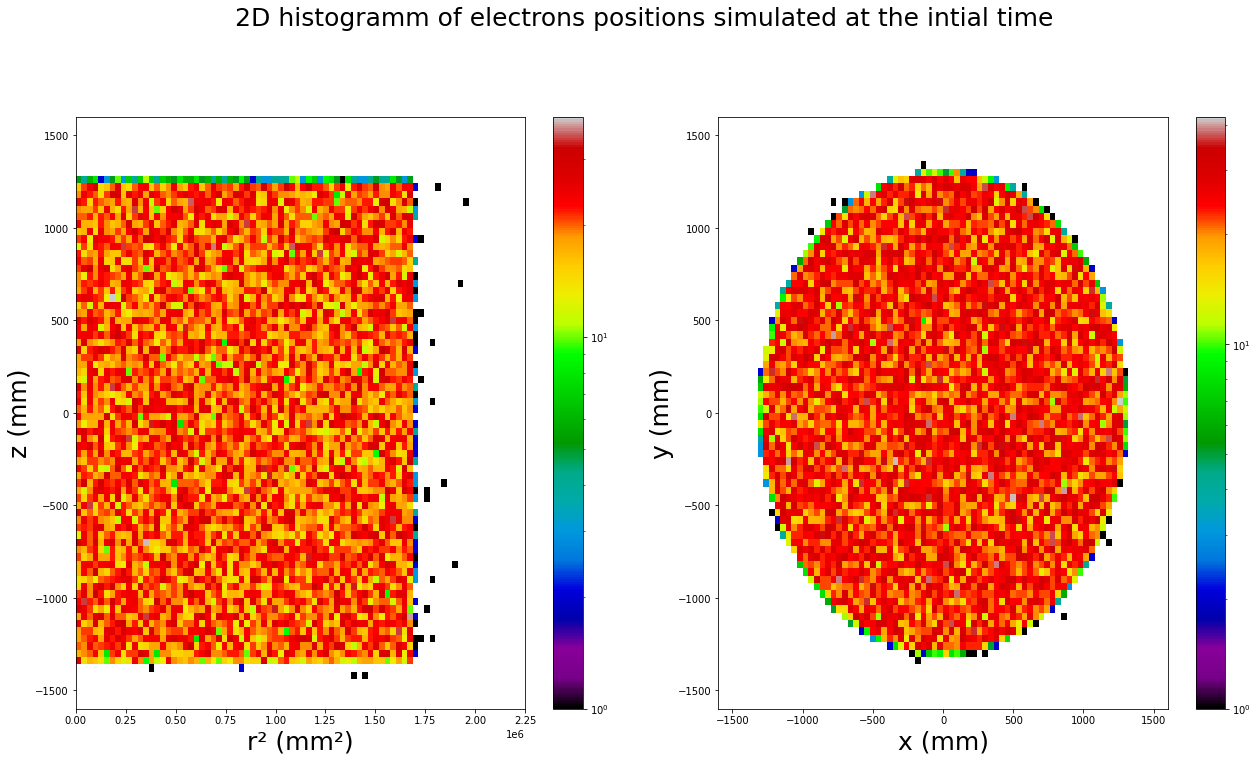

In [9]:
## Histogrammes 2D des positions des électrons à l'instant initiale.

r2 = np.array( xp_priHSD1**2) + np.array(yp_priHSD1**2) 

f = plt.figure(1)

g1 = plt.subplot(221)
plt.hist2d(r2, zp_priHSD1, bins = (80,80), range = [[0,1500**2],[-1600,1600]], cmap = "nipy_spectral", norm = colors.LogNorm())
#plt.title("Slice view : %i remaining events from 100 000 simulated in cylinder (z = 3000, r = 1500)"%len(xp_priHSD1), fontsize=12)
plt.xlabel('r² (mm²)', fontsize=25)  
plt.ylabel('z (mm)', fontsize=25)
plt.colorbar() 


g2 = plt.subplot(222)
plt.hist2d(xp_priHSD1,yp_priHSD1, bins = (80,80), range = [[-1600,1600],[-1600,1600]], cmap = "nipy_spectral", norm = colors.LogNorm())
#plt.title("Top view : %i remaining events from 100 000 simulated in cylinder (z = 3000, r = 1500)"%len(xp_priHSD1), fontsize=12)
plt.xlabel('x (mm)', fontsize=25)  
plt.ylabel('y (mm)', fontsize=25)
plt.colorbar() 


f.set_figheight(18)
f.set_figwidth(18)
plt.suptitle('2D histogramm of electrons positions simulated at the intial time',fontsize=25, y=1.05)
plt.subplots_adjust(left=None, bottom = 1 , right=None, top=2.5, wspace=None, hspace=None)

plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()



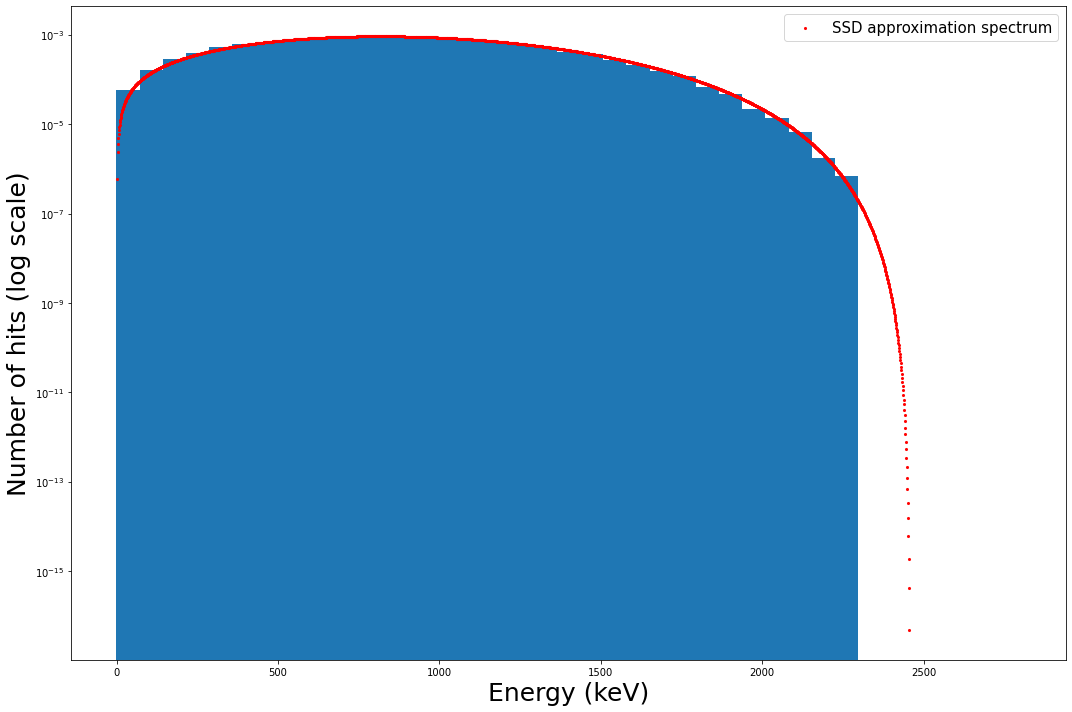

In [10]:
## Spectre théorique comparer au spectre de simulation (en échelle log)

bins = 40

f, ax = plt.subplots(1, figsize=(15,10))

ax.hist(testSSD12,np.linspace(-0.5,2800,bins), density = True, log = True )
ax.scatter(
    , normssd, linewidth=0.1, label='SSD approximation spectrum', marker='.', color = 'red')
#ax.set_title('Inital kinetic energies of electrons (%i events)'%len(xp_priSSD1), fontsize=25)
ax.set_xlabel('Energy (keV)', fontsize=25)
ax.set_ylabel('Number of hits (log scale)', fontsize=25)


ax.legend(fontsize=15)

f.tight_layout()

In [11]:
## Implémentation de la résolution en énergie

incerta = 0.007
incertb = 0.0002

def resolution(x,a,b):
    return a/((x)**0.5) + b

def gaus(x, mean, sigma):
    return (1/(2*np.pi*sigma**2))**0.5*np.exp(-0.5*((mean-x)/sigma)**2)

## Fonction de smearing permettant d'intégrer la résolution en énergie

def smear_spectrum(counts,bin_indices, energy_range=(0,5000), binsize=0.1, smearingpars=(0.313,0.0017)):

    #set parameters
    nbins=int((energy_range[1]-energy_range[0])/binsize)
    smeared_counts=[]
    smeared_energy=[]
    
    #Création liste incertitude

    bin_indices=bin_indices[:-1]
    smeared_energies=np.add(bin_indices,binsize/2)
    smeared_counts=np.zeros_like(bin_indices)
    
    
    ##Try
    smeared_counts_try=np.zeros_like(bin_indices)
    incertcount1=np.zeros_like(bin_indices)
    incertcount2=np.zeros_like(bin_indices)
    
    # Incertitude sur la résolution
    incert_smeared_resolution=np.zeros_like(bin_indices)

    #smearing powered by Fei
    for i, x in enumerate(bin_indices):
        sigma = resolution(smeared_energies,smearingpars[0], smearingpars[1]) * smeared_energies # sigma at each bin ## changement (x+(binsize/2)) en smeared
        prob = gaus((x+(binsize/2)), smeared_energies, sigma) # probablity for each bin          
            
        smeared_counts[i] = np.sum(prob * counts * binsize) # sum over 
        
        # Incertitudes sur sigma / la gaussienne / nombre de coups en propageant celle de la résolution en énergie 
        incertsigma = np.sqrt(smeared_energies) * np.sqrt(incerta**2 + smeared_energies * incertb**2) ############ mettre x+binsize/2 smeared_energies??
        incertgauss = incertsigma/sigma * prob * np.sqrt((((4*(x-smeared_energies)**2)/sigma)*(((x-smeared_energies)**2/sigma)-1)) + 1) 
        incert_smeared_resolution[i] = np.sum(incertgauss * counts * binsize) 
        
        ###Test###
        incertprob1 = gaus((x+(binsize/2)), smeared_energies, sigma+incertsigma) # incert probablity for each bin +
        incertprob2 = gaus((x+(binsize/2)), smeared_energies, sigma-incertsigma) # incert probablity for each bin -
        incertcount1[i] = np.sum(incertprob1 * counts * binsize)
        incertcount2[i] = np.sum(incertprob2 * counts * binsize)
        
        resE = gaus(x+(binsize/2),sigma/smeared_energies,incertsigma+sigma/smeared_energies)
        moyE = gaus(x+(binsize/2),smeared_energies,smeared_energies +resE)
        smeared_counts_try[i] =np.sum(moyE* counts * binsize) # try
        
        sigE = sigma*100 / smeared_energies
        incertsigE = incertsigma*sigE/sigma 
        #########################
        
        #Why does bin size go in here? 
        #It must because otherwise the area under the smeared histogram is 1/binsize bigger than under unsmeared.
    return smeared_energies, smeared_counts, incert_smeared_resolution, sigE, incertsigE, incertcount1, incertcount2  #, smeared_counts_try

In [12]:
## Test de la fonction de smearing

x = np.zeros(10000)
for i in range (5000):
    x[i] = 1500   
    
counts_SS, bin_indices=np.histogram(x,range=(0,5000), bins=5000)
smeared_energies_SS, smeared_counts_SS, incert_smeared_resolution, sigE, incertsigE, incert_smeared_resolution1, incert_smeared_resolution2 = smear_spectrum(counts_SS,bin_indices, energy_range=(0,5000), binsize=10, smearingpars=(0.3171,0.0015))

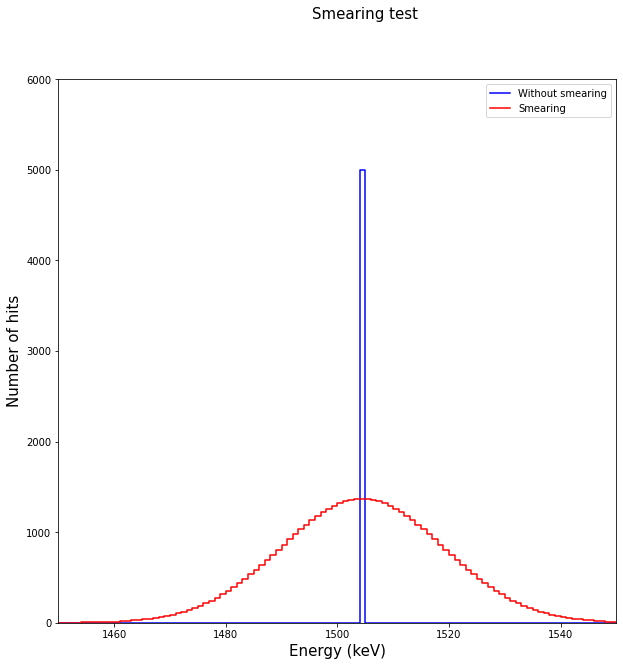

In [13]:
f = plt.figure(1, figsize=(10,10))
plt.step(smeared_energies_SS, counts_SS, color='b', label='Without smearing')
plt.step(smeared_energies_SS, smeared_counts_SS, color = 'r', label='Smearing')
plt.xlabel('Energy (keV)', fontsize=15)
plt.ylabel('Number of hits', fontsize=15)
plt.legend(fontsize=10)
plt.title("Smearing test", fontsize=15, x=0.55, y=1.1)
plt.xlim(1450,1550)
plt.ylim(0,6000)


plt.show()

In [14]:
counts_SS_HSD, bin_indices=np.histogram(testHSD12.values,range=(0,5000), bins=500)
counts_SS_SSD, bin_indices=np.histogram(testSSD12.values,range=(0,5000), bins=500)

#Smearing energy spectrum
smeared_energies_SS, smeared_counts_SS_HSD, incert_smeared_resolution_HSD, sigE_HSD,incertsigE_HSD,up_HSD,down_HSD = smear_spectrum(counts_SS_HSD,bin_indices, energy_range=(0,5000), binsize=10, smearingpars=(0.3171,0.0015))
smeared_energies_SS, smeared_counts_SS_SSD, incert_smeared_resolution_SSD, sigE_SSD,incertsigE_SSD,up_SSD,down_SSD = smear_spectrum(counts_SS_SSD,bin_indices, energy_range=(0,5000), binsize=10, smearingpars=(0.3171,0.0015))

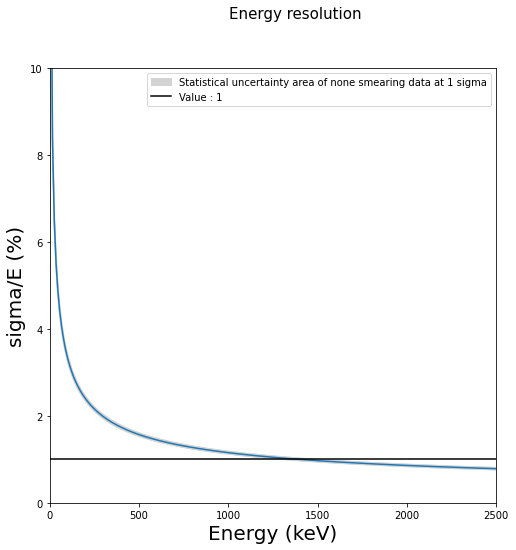

In [15]:
errormax = np.zeros(len(incertsigE_HSD))
errormin = np.zeros(len(incertsigE_HSD))

for i in range (len(incertsigE_HSD)):
    errormax[i] = sigE_HSD[i] + incertsigE_HSD[i]
    errormin[i] = sigE_HSD[i] - incertsigE_HSD[i]
    

f = plt.figure(1, figsize=(8,8))
plt.plot(smeared_energies_SS, errormax, color='lightgray')
plt.plot(smeared_energies_SS, errormin, color='lightgray')
plt.fill_between(smeared_energies_SS, errormin, errormax, color='lightgray', label ='Statistical uncertainty area of none smearing data at 1 sigma')
plt.plot(smeared_energies_SS,sigE_HSD)
plt.axhline(y=1.0, color = 'black', label = 'Value : 1')
plt.xlim(0,2500)
plt.ylim(0,10)
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('sigma/E (%)', fontsize=20)
plt.legend(fontsize=10)
plt.title("Energy resolution", fontsize=15, x=0.55, y=1.1)
plt.show()

In [16]:
a = np.zeros(len(counts_SS_HSD))

# Erreur statistique avant smearing
erreurHSD = np.zeros(len(counts_SS_HSD))
erreurSSD = np.zeros(len(counts_SS_HSD))

# Bornes d'incertitudes supérieures et inférieures pour les deux approximations avant smearing
ymaxiHSD = np.zeros(len(counts_SS_HSD))
yminiHSD = np.zeros(len(counts_SS_HSD))
ymaxiSSD = np.zeros(len(counts_SS_HSD))
yminiSSD = np.zeros(len(counts_SS_HSD))

# Erreur statistique sur le sprectre après smearing
erreursmearedSSD = np.zeros(len(counts_SS_HSD))
erreursmearedHSD = np.zeros(len(counts_SS_HSD))

# Somme des erreurs statistiques et de la résolution en énergie après smearing
addmaxHSD = np.zeros(len(counts_SS_HSD)) #Méthode gaussienne extrêmes
addminHSD = np.zeros(len(counts_SS_HSD))

addmaxHSD2 = np.zeros(len(counts_SS_HSD)) #Méthode dérivation
addminHSD2 = np.zeros(len(counts_SS_HSD))

In [17]:
for i in range(len(counts_SS_HSD)):
    
    # Erreur statistique sur le sprectre avant smearing
    erreurHSD[i] = np.sqrt(counts_SS_HSD[i])
    erreurSSD[i] = np.sqrt(counts_SS_SSD[i])
    
    # Bornes d'incertitudes supérieures et inférieures pour les deux approximations avant smearing
    ymaxiHSD[i] = counts_SS_HSD[i] + erreurHSD[i]
    yminiHSD[i] = counts_SS_HSD[i] - erreurHSD[i]
    ymaxiSSD[i] = counts_SS_SSD[i] + erreurSSD[i]
    yminiSSD[i] = counts_SS_SSD[i] - erreurSSD[i]
    
    # Erreur statistique sur le sprectre après smearing
    erreursmearedHSD[i] = np.sqrt(smeared_counts_SS_HSD[i]) 
    erreursmearedSSD[i] = np.sqrt(smeared_counts_SS_SSD[i]) 
    
    # Somme des erreurs statistiques et de la résolution en énergie après smearing
    addmaxHSD2[i] = smeared_counts_SS_HSD[i] + np.sqrt(erreursmearedHSD[i]**2 + (incert_smeared_resolution_HSD[i]-smeared_counts_SS_HSD[i]**2))
    addminHSD2[i] = smeared_counts_SS_HSD[i] - np.sqrt(erreursmearedHSD[i]**2 + (incert_smeared_resolution_HSD[i]-smeared_counts_SS_HSD[i])**2)
    
    addmaxHSD[i] = smeared_counts_SS_HSD[i] + np.sqrt(erreursmearedHSD[i]**2 + (up_HSD[i]-smeared_counts_SS_HSD[i])**2)
    addminHSD[i] = smeared_counts_SS_HSD[i] - np.sqrt(erreursmearedHSD[i]**2 + (down_HSD[i]-smeared_counts_SS_HSD[i])**2)
    

/tmp/jobs/21806874/ipykernel_521/242921543.py:18: RuntimeWarning: invalid value encountered in sqrt
  addmaxHSD2[i] = smeared_counts_SS_HSD[i] + np.sqrt(erreursmearedHSD[i]**2 + (incert_smeared_resolution_HSD[i]-smeared_counts_SS_HSD[i]**2))


In [18]:
supp = np.zeros(len(smeared_counts_SS_HSD))
inf = np.zeros(len(smeared_counts_SS_HSD))

for i in range(len(smeared_counts_SS_HSD)):
    supp[i] = smeared_counts_SS_HSD[i] + erreursmearedHSD[i]
    inf[i] = smeared_counts_SS_HSD[i] - erreursmearedHSD[i]
    

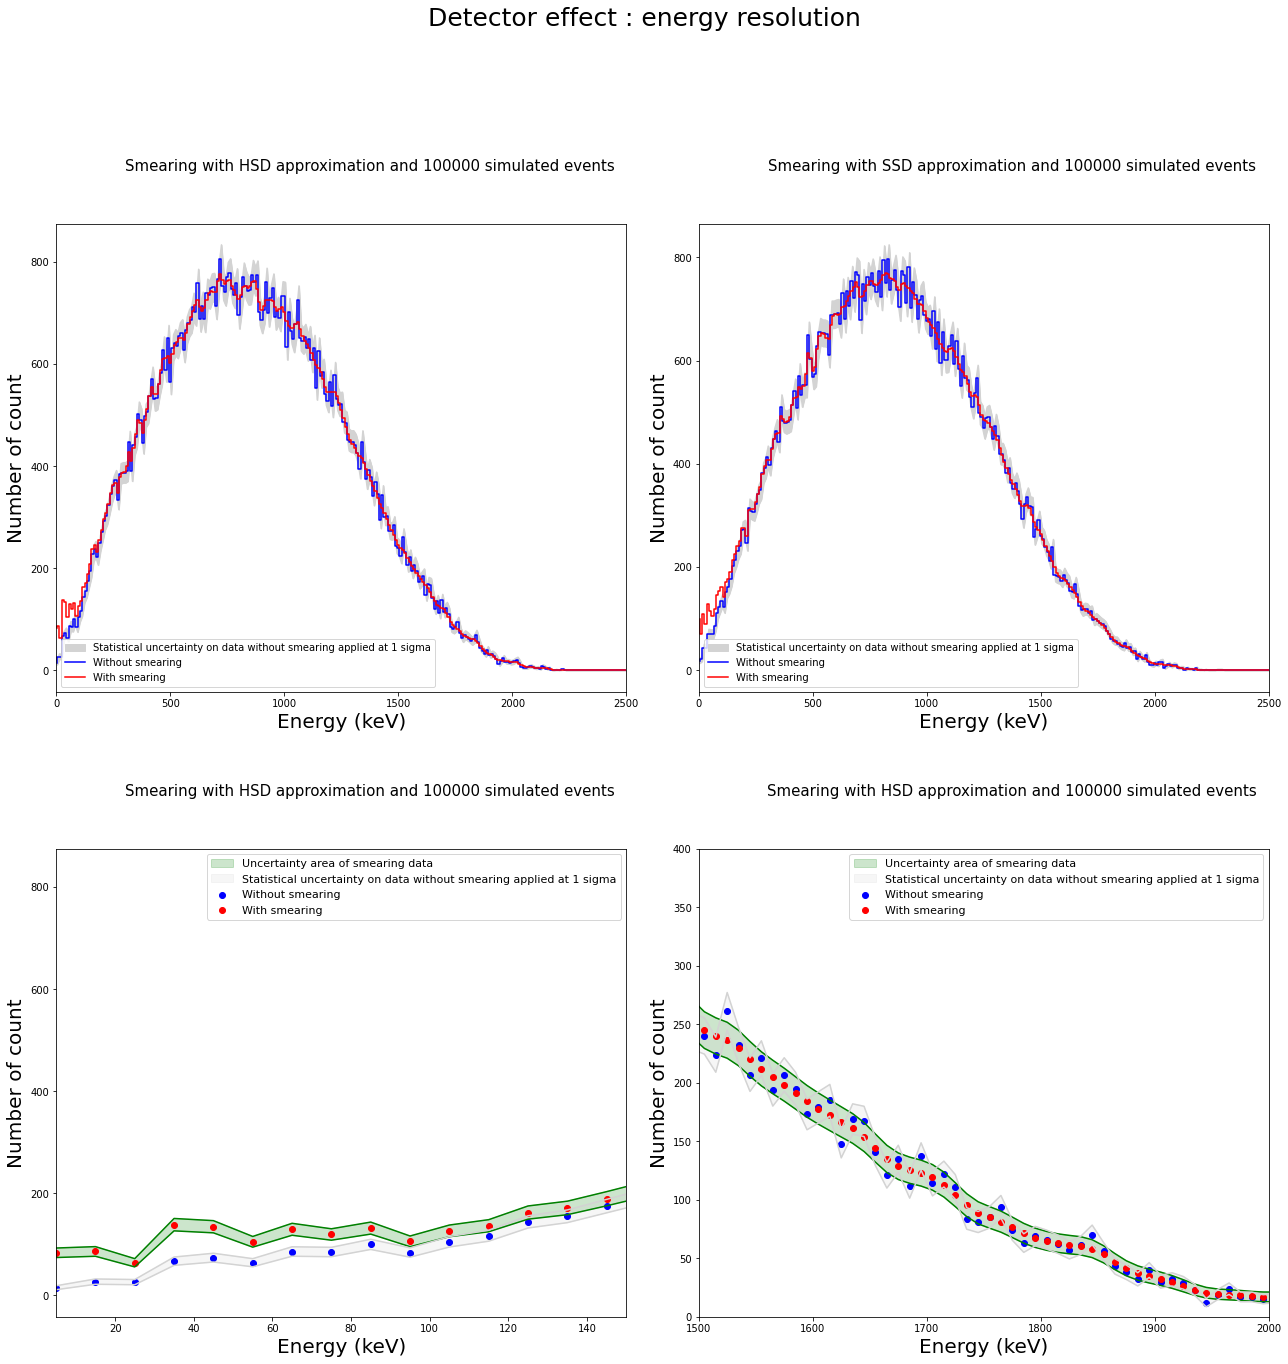

In [19]:
f = plt.figure(1)

g1 = plt.subplot(221)
#plt.plot(smeared_energies_SS, ymaxicountHSD, color='yellow')
#plt.plot(smeared_energies_SS, yminicountHSD, color='yellow')
#plt.fill_between(smeared_energies_SS, yminicountHSD, ymaxicountHSD, color='yellow', alpha = 0.5, label ='Propagation uncertainty area of smearing data (including detector effect)')

#plt.plot(smeared_energies_SS, addmaxHSD, color='green')
#plt.plot(smeared_energies_SS, addminHSD, color='green')
#plt.fill_between(smeared_energies_SS, addminHSD, addmaxHSD, color='green', alpha = 0.5, label ='Propagation uncertainty area of smearing data (including detector effect)')

plt.plot(smeared_energies_SS, ymaxiHSD, color='lightgray')
plt.plot(smeared_energies_SS, yminiHSD, color='lightgray')
plt.fill_between(smeared_energies_SS, yminiHSD, ymaxiHSD, color='lightgray', label ='Statistical uncertainty on data without smearing applied at 1 sigma')
plt.step(smeared_energies_SS, counts_SS_HSD, color='b', label='Without smearing')
plt.step(smeared_energies_SS, smeared_counts_SS_HSD, color = 'r', label='With smearing')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Number of count', fontsize=20)
plt.legend(fontsize=10)
plt.title("Smearing with HSD approximation and %i simulated events"%100000, fontsize=15, x=0.55, y=1.1)
plt.xlim(0,2500)

g2 = plt.subplot(222)
plt.plot(smeared_energies_SS, ymaxiSSD, color='lightgray')
plt.plot(smeared_energies_SS, yminiSSD, color='lightgray')
plt.fill_between(smeared_energies_SS, yminiSSD, ymaxiSSD, color='lightgray', label ='Statistical uncertainty on data without smearing applied at 1 sigma')
plt.step(smeared_energies_SS,counts_SS_SSD, color='b', label='Without smearing')
plt.step(smeared_energies_SS,smeared_counts_SS_SSD, color = 'r', label='With smearing')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Number of count', fontsize=20)
plt.legend(fontsize=10)
plt.title("Smearing with SSD approximation and %i simulated events"%100000, fontsize=15, x=0.55, y=1.1)
plt.xlim(0,2500)

g3 = plt.subplot(223)

#plt.plot(smeared_energies_SS, addmaxHSD2, color='purple')
#plt.plot(smeared_energies_SS, addminHSD2, color='purple')
#plt.fill_between(smeared_energies_SS, addminHSD2, addmaxHSD2, color='purple', alpha = 0.2, label ='Uncertainty area of smearing data')

plt.plot(smeared_energies_SS, addmaxHSD, color='green')
plt.plot(smeared_energies_SS, addminHSD, color='green')
plt.fill_between(smeared_energies_SS, addminHSD, addmaxHSD, color='green', alpha = 0.2, label ='Uncertainty area of smearing data')#(including detector effect and statistical uncertainty)

plt.plot(smeared_energies_SS, ymaxiHSD, color='lightgray')
plt.plot(smeared_energies_SS, yminiHSD, color='lightgray')
plt.fill_between(smeared_energies_SS, yminiHSD, ymaxiHSD, color='lightgray', alpha = 0.2, label ='Statistical uncertainty on data without smearing applied at 1 sigma')

plt.scatter(smeared_energies_SS, counts_SS_HSD, color='b', label='Without smearing')
plt.scatter(smeared_energies_SS, smeared_counts_SS_HSD, color = 'r', label='With smearing')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Number of count', fontsize=20)
plt.legend(fontsize=11)
plt.title("Smearing with HSD approximation and %i simulated events"%100000, fontsize=15, x=0.55, y=1.1)
plt.xlim(5,150)

g4 = plt.subplot(224)

#plt.plot(smeared_energies_SS, addmaxHSD2, color='purple')
#plt.plot(smeared_energies_SS, addminHSD2, color='purple')
#plt.fill_between(smeared_energies_SS, addminHSD2, addmaxHSD2, color='purple', alpha = 0.2, label ='Uncertainty area of smearing data')

plt.plot(smeared_energies_SS, addmaxHSD, color='green')
plt.plot(smeared_energies_SS, addminHSD, color='green')
plt.fill_between(smeared_energies_SS, addminHSD, addmaxHSD, color='green', alpha = 0.2, label ='Uncertainty area of smearing data')# (including detector effect and statistical uncertainty)

#plt.plot(smeared_energies_SS, supp, color=yellow')
#plt.plot(smeared_energies_SS, inf, color='yellow')
#plt.fill_between(smeared_energies_SS, inf, supp, color='yellow', alpha = 0.2, label ='Uncertainty area of smearing data')

plt.plot(smeared_energies_SS, ymaxiHSD, color='lightgray')
plt.plot(smeared_energies_SS, yminiHSD, color='lightgray')
plt.fill_between(smeared_energies_SS, yminiHSD, ymaxiHSD, color='lightgray', alpha = 0.2, label ='Statistical uncertainty on data without smearing applied at 1 sigma')

plt.scatter(smeared_energies_SS, counts_SS_HSD, color='b', label='Without smearing')
plt.scatter(smeared_energies_SS, smeared_counts_SS_HSD, color = 'r', label='With smearing')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Number of count', fontsize=20)
plt.legend(fontsize=11)
plt.title("Smearing with HSD approximation and %i simulated events"%100000, fontsize=15, x=0.55, y=1.1)
plt.xlim(1500,2000)
plt.ylim(0,400)

f.set_figheight(18)
f.set_figwidth(18)
plt.suptitle('Detector effect : energy resolution',fontsize=25, y=1.05)
plt.subplots_adjust(left=None, bottom = 1 , right=None, top=2.5, wspace=None, hspace=None)

plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()



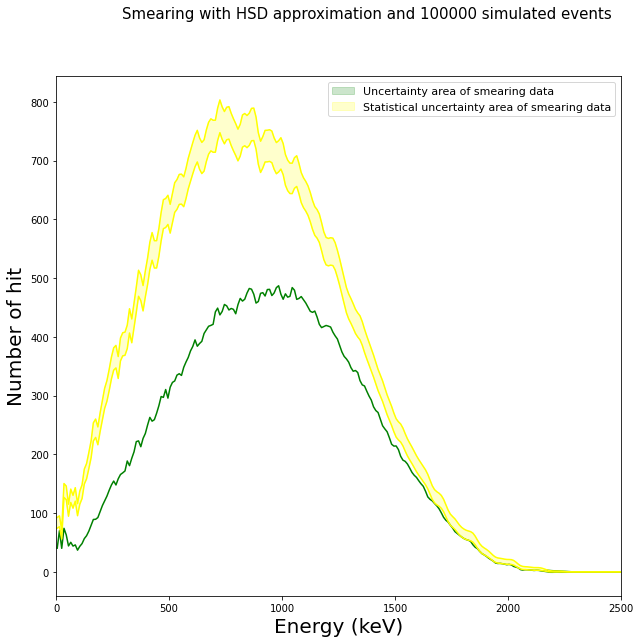

In [20]:
f = plt.figure(1)

plt.plot(smeared_energies_SS, addmaxHSD2, color='green')
plt.plot(smeared_energies_SS, addminHSD2, color='green')
plt.fill_between(smeared_energies_SS, addminHSD2, addmaxHSD2, color='green', alpha = 0.2, label ='Uncertainty area of smearing data')# (including detector effect and statistical uncertainty)

plt.plot(smeared_energies_SS, supp, color='yellow')
plt.plot(smeared_energies_SS, inf, color='yellow')
plt.fill_between(smeared_energies_SS, inf, supp, color='yellow', alpha = 0.2, label ='Statistical uncertainty area of smearing data')


#plt.scatter(smeared_energies_SS, counts_SS_HSD, color='b', label='Without smearing')
#plt.scatter(smeared_energies_SS, smeared_counts_SS_HSD, color = 'r', label='With smearing')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Number of hit', fontsize=20)
plt.legend(fontsize=11)
plt.title("Smearing with HSD approximation and %i simulated events"%100000, fontsize=15, x=0.55, y=1.1)
#plt.xlim(1500,2000)
#plt.ylim(0,400)
plt.xlim(0,2500)
f.set_figheight(9)
f.set_figwidth(9)

plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()

In [21]:
a = 0

for i in range(len(smeared_counts_SS_HSD)):
    a = a + smeared_counts_SS_HSD[i]
print(a)

82730.90567682723


In [22]:
Na = 6.022e23
Epsilon = 0.0886
Mxe = 135.907e-3
Tdemi = 2.165e21
deltae = 0
Masse = 5000
coup_total = 0

for i in range(len(smeared_counts_SS_HSD)):
    coup_total = coup_total + smeared_counts_SS_HSD[i]

def scaling_factor(deltae):
    return (np.log(2)*Epsilon*Na)/(deltae*Tdemi*Mxe*365)

Sxe = scaling_factor(10) 
print('Sxe = ', Sxe, '(kg.day.keV)^-1')

## Calcul du nombre de jour, pour 5 tonnes de xénon liquide, qu'il faut pour atteindre 10 000 événements

def nbr_jours(Sxe,M):
    return Sxe*M*10*3650

print(nbr_jours(Sxe,Masse))

##Multiplier le spectre par ca et intégrer

Sxe =  0.034435575301356346 (kg.day.keV)^-1
6284492.492497534


In [23]:
# Implémentation du facteur d'échelle pour obtenir un taux d'événements
new_smeared_counts_SS_HSD = smeared_counts_SS_HSD * Sxe# * 5000
new_smeared_counts_SS_SSD = smeared_counts_SS_SSD * Sxe# * 5000

# Incertitude sur le nouveau taux
incert_factor_up_HSD = np.zeros(len(new_smeared_counts_SS_HSD))
incert_factor_up_SSD = np.zeros(len(new_smeared_counts_SS_SSD))
incert_factor_down_HSD = np.zeros(len(new_smeared_counts_SS_HSD))
incert_factor_down_SSD = np.zeros(len(new_smeared_counts_SS_SSD))

# Bornes supérieurs et inférieures du nouveau taux
miniHSD = np.zeros(len(new_smeared_counts_SS_HSD))
maxiHSD = np.zeros(len(new_smeared_counts_SS_HSD))
miniSSD = np.zeros(len(new_smeared_counts_SS_SSD))
maxiSSD = np.zeros(len(new_smeared_counts_SS_SSD))

# Incertitude sur le facteur d'échelle
Sxe_erreur = Sxe*np.sqrt((0.0054/0.0886)**2+(0.075e21/2.165e21)**2)

for i in range(len(new_smeared_counts_SS_HSD )):
    
    # Incertitude sur le nouveau taux
    #incert_factor_up_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + incert_smeared_resolution_HSD[i]**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
    #incert_factor_up_SSD[i] = new_smeared_counts_SS_SSD[i]*np.sqrt(((erreursmearedSSD[i] + incert_smeared_resolution_SSD[i])/smeared_counts_SS_SSD[i])**2+(Sxe_erreur/Sxe)**2)
    incert_factor_up_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + (up_HSD[i]-smeared_counts_SS_HSD[i])**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
    incert_factor_up_SSD[i] = new_smeared_counts_SS_SSD[i]*np.sqrt(((np.sqrt(erreursmearedSSD[i]**2 + (up_SSD[i]-smeared_counts_SS_SSD[i])**2))/smeared_counts_SS_SSD[i])**2+(Sxe_erreur/Sxe)**2)
    incert_factor_down_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + (down_HSD[i]-smeared_counts_SS_HSD[i])**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
    incert_factor_down_SSD[i] = new_smeared_counts_SS_SSD[i]*np.sqrt(((np.sqrt(erreursmearedSSD[i]**2 + (down_SSD[i]-smeared_counts_SS_SSD[i])**2))/smeared_counts_SS_SSD[i])**2+(Sxe_erreur/Sxe)**2)
    
    
    # Bornes supérieurs et inférieures du nouveau taux
    miniHSD[i] = new_smeared_counts_SS_HSD[i] - incert_factor_down_HSD[i]
    maxiHSD[i] = new_smeared_counts_SS_HSD[i] + incert_factor_up_HSD[i]
    miniSSD[i] = new_smeared_counts_SS_SSD[i] - incert_factor_down_SSD[i]
    maxiSSD[i] = new_smeared_counts_SS_SSD[i] + incert_factor_up_SSD[i]
    

/tmp/jobs/21806874/ipykernel_521/1673681758.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  incert_factor_up_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + (up_HSD[i]-smeared_counts_SS_HSD[i])**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
/tmp/jobs/21806874/ipykernel_521/1673681758.py:25: RuntimeWarning: invalid value encountered in multiply
  incert_factor_up_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + (up_HSD[i]-smeared_counts_SS_HSD[i])**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
/tmp/jobs/21806874/ipykernel_521/1673681758.py:27: RuntimeWarning: invalid value encountered in double_scalars
  incert_factor_down_HSD[i] = new_smeared_counts_SS_HSD[i]*np.sqrt(((np.sqrt(erreursmearedHSD[i]**2 + (down_HSD[i]-smeared_counts_SS_HSD[i])**2))/smeared_counts_SS_HSD[i])**2+(Sxe_erreur/Sxe)**2)
/tmp/jobs/21806874/ipykernel_521/1673681758.py:25: RuntimeWarning: invalid value encountered

In [24]:
# Ratio entre les taux de HSD et SSD
new_ratio = 100*new_smeared_counts_SS_HSD / new_smeared_counts_SS_SSD

# Incertitude sur le ratio
ratio_incert_factor_up = np.zeros(len(new_smeared_counts_SS_HSD))
ratio_incert_factor_down = np.zeros(len(new_smeared_counts_SS_HSD))
ratio_incert_factor = np.zeros(len(new_smeared_counts_SS_HSD))


# Bornes supérieures et inférieures des incertitudes sur le ratio
ratiomini = np.zeros(len(new_ratio)) #Double gaussienne
ratiomaxi = np.zeros(len(new_ratio))

ratiomini2 = np.zeros(len(new_ratio)) # Dérivée
ratiomaxi2 = np.zeros(len(new_ratio))

for i in range(len(new_smeared_counts_SS_HSD)):
    
    # Incertitude sur le ratio
    ratio_incert_factor_up[i] = new_ratio[i]*np.sqrt((incert_factor_up_HSD[i]/new_smeared_counts_SS_HSD[i])**2+(incert_factor_up_SSD[i]/new_smeared_counts_SS_SSD[i])**2)
    ratio_incert_factor_down[i] = new_ratio[i]*np.sqrt((incert_factor_down_HSD[i]/new_smeared_counts_SS_HSD[i])**2+(incert_factor_down_SSD[i]/new_smeared_counts_SS_SSD[i])**2)
    
    ratio_incert_factor[i] = new_ratio[i]*np.sqrt((incert_factor_up_HSD[i]/new_smeared_counts_SS_HSD[i])**2+(incert_factor_up_SSD[i]/new_smeared_counts_SS_SSD[i])**2)
    
    ratiomini[i] = (new_ratio[i] - ratio_incert_factor_down[i])
    ratiomaxi[i] = (new_ratio[i] + ratio_incert_factor_up[i])   
    
    ratiomini2[i] = (new_ratio[i] - ratio_incert_factor_down[i])
    ratiomaxi2[i] = (new_ratio[i] + ratio_incert_factor_up[i])
    
    
## Faire avec méthode dérivation

/tmp/jobs/21806874/ipykernel_521/4037940994.py:2: RuntimeWarning: invalid value encountered in true_divide
  new_ratio = 100*new_smeared_counts_SS_HSD / new_smeared_counts_SS_SSD


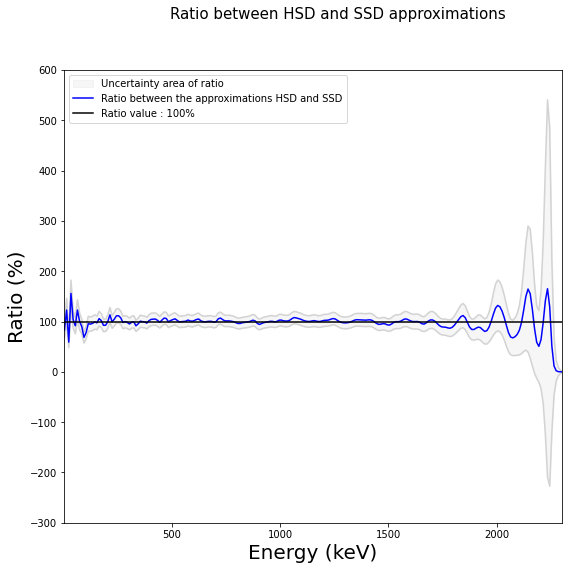

In [25]:
f = plt.figure(1, figsize=(8,8))

plt.plot(smeared_energies_SS, ratiomini, color='lightgray')
plt.plot(smeared_energies_SS, ratiomaxi, color='lightgray')
plt.fill_between(smeared_energies_SS, ratiomini, ratiomaxi, color='lightgray', alpha=0.2, label ='Uncertainty area of ratio')
plt.plot(smeared_energies_SS, new_ratio, color='b', label = 'Ratio between the approximations HSD and SSD')
plt.axhline(y=100.0, color = 'black', label = 'Ratio value : 100%')
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Ratio (%)', fontsize=20)
plt.legend(fontsize=10)
plt.title("Ratio between HSD and SSD approximations", fontsize=15, x=0.55, y=1.1)
plt.xlim(5,2300)
plt.ylim(-300,600)


plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()

# Fiche d'obtention des formules d'incertitudes après propagation :

$$\boxed{\sigma_{res}=\Bigg(\frac{a}{\sqrt{E}}+b\Bigg)E}$$

Pour propager l'incertitude sur cette formule, il faut tenir compte des incertitudes sur a et b.

On a $a=0.313 \pm 0.007$ et $b=0.0017 \pm 0.0002$

En utilisant la formule de propagation en utilisant les dérivées :

$V(variable) = \sum_i \Big(\frac{\partial variable}{\partial param_i}\Big)^2 \times V(param_i)$

En l'appliquant à la formule de la résolution sur les paramètres a et b et en considérant $V_i = \sigma_i ^2$, nous obtenons :

$$\boxed{\sigma_{\sigma_{res}}= \sqrt{E \times (\sigma_a^2+E\times \sigma_b^2)}}$$

En propageant cette incertitude dans la gaussienne, toujours avec la méthode des dérivées, nous obtenons :

$$V(gaussienne)=\Big(\frac{\partial gaussienne}{\partial \sigma_{res}}\Big)^2 \times V(\sigma_{res})$$
   
En posant $u = \frac{1}{\sqrt{2 \times \pi} \times \sigma_{res}}$ et $v = e^{-\frac{(x-\mu)^2}{2\sigma_{res}^2}}$ et donc $u'=-\frac{u}{\sigma_{res}}$ et $v'= gaussienne \times \frac{2(x-\mu)^2}{\sigma_{res}^2}$, la dérivée devient :  

\begin{align}
    V(gaussienne)&=\sigma_{\sigma_{res}}^2 \times \Bigg[gaussienne \times \Bigg(\frac{2(x-\mu)^2}{\sigma_{res}^2} - \frac{1}{\sigma_{res}}  \Bigg)\Bigg]^2\\
    \sigma(gaussienne)&=\sigma_{\sigma_{res}} \times gaussienne \times \sqrt{\Bigg(\frac{4(x-\mu)^4}{\sigma_{res}^4} + \frac{1}{\sigma_{res}^2} - \frac{4(x-\mu)^2}{\sigma_{res}^3}  \Bigg)} \\
    \sigma(gaussienne)&=\frac{\sigma_{\sigma_{res}}}{\sigma_{res}} \times gaussienne \times \sqrt{\Bigg[\frac{4(x-\mu)^2}{\sigma_{res}}\Bigg(\frac{(x-\mu)^2}{\sigma_{res}}-1\Bigg) + 1 \Bigg]} \\
\end{align}


De la même manière que pour l'incertitude sur la résolution en énergie, nous pouvons obtenir l'incertitude sur le facteur d'échelle et obtenons :

$$\boxed{\sigma_{S_{^{136}Xe}} = S_{Xe} \times \sqrt{\Bigg(\frac{\sigma(T_{1/2})}{T_{1/2}}\Bigg)^2+\Bigg(\frac{\sigma(\epsilon)}{\epsilon}\Bigg)^2}}$$

In [26]:
# Définition du volume (dimensions du cylindre) de 5 tonnes de xénon liquide

def volume(h,r):
    return np.pi*r**2*h

def masse(volume):
    return volume*3

volumetot = 5e6/3 # Volume pour 5 tonnes de xénon liquide
print('Volume du cylindre :', volume(51,102), 'cm³')
print('Volume d\'un cylindre contenant 5 tonnes de xénon liquide :',volumetot)

x5t = 510 #mm
y5t = 510 #mm
z5t = 1020 #mm

Volume du cylindre : 1666941.6283653586 cm³
Volume d'un cylindre contenant 5 tonnes de xénon liquide : 1666666.6666666667


In [27]:
newxpHSD1 = np.zeros(len(xpHSD1))
newypHSD1 = np.zeros(len(ypHSD1))
newzpHSD1 = np.zeros(len(zpHSD1))

In [28]:
#for i in range(len(xpHSD1)):
   # newxpHSD1[i] = int(xpHSD1[i][0])
   # newypHSD1[i] = int(ypHSD1[i][0])
    #newzpHSD1[i] = int(zpHSD1[i][0])


In [29]:
#for i in range (len(newxpHSD1)): 
 #   if abs(newxpHSD1[i][0]) > x5t:
  #      newxpHSD1[i][0] = 0
   # else:
    #    continue

#for i in range (len(newypHSD1)):
 #   if abs(newypHSD1[i][0]) > y5t:
  #      newypHSD1[i][0] = 0
   # else:
    #    continue
    
#for i in range (len(newzpHSD1)): 
 #   if abs(newzpHSD1[i][0]) > z5t:
  #      newzpHSD1[i][0] = 0
   # else:
    #    continue
       
##récuperer index des élements supprimer et supprimer les meme dans energies

In [30]:
#newxpHSD1 = remove_items(newxpHSD1, 0)
#newypHSD1 = remove_items(newypHSD1, 0)
#newzpHSD1 = remove_items(newzpHSD1, 0)

#print(len(newxpHSD1))
#print(newxpHSD1)

In [31]:
counts_SS_HSD_cut = remove_items(counts_SS_HSD_cut, 0)
counts_SS_SSD_cut = remove_items(counts_SS_SSD_cut, 0)
smeared_energies_SS_cut_HSD = remove_items(smeared_energies_SS_cut_HSD, 0)
smeared_energies_SS_cut_SSD = remove_items(smeared_energies_SS_cut_SSD, 0)
erreurHSD = remove_items(erreurHSD, 0)
erreurSSD = remove_items(erreurSSD, 0)

NameError: name 'remove_items' is not defined

In [ ]:
while len(counts_SS_HSD_cut) > 30:
    for i in range(len(counts_SS_HSD_cut)):    
        if (i % 2)== 0:
            counts_SS_HSD_cut[i] = 0
            smeared_energies_SS_cut_HSD[i] = 0 
            erreurHSD[i] = 0
            
    counts_SS_HSD_cut = remove_items(counts_SS_HSD_cut, 0)
    smeared_energies_SS_cut_HSD = remove_items(smeared_energies_SS_cut_HSD, 0)
    erreurHSD = remove_items(erreurHSD, 0)
    continue

    
while len(counts_SS_SSD_cut) > 30:
    for i in range(len(counts_SS_SSD_cut)):    
        if (i % 2)== 0:
            counts_SS_SSD_cut[i] = 0
            smeared_energies_SS_cut_SSD[i] = 0 
            erreurSSD[i] = 0
            
    counts_SS_SSD_cut = remove_items(counts_SS_SSD_cut, 0)
    smeared_energies_SS_cut_SSD = remove_items(smeared_energies_SS_cut_SSD, 0)
    erreurSSD = remove_items(erreurSSD, 0)
    continue

In [ ]:
f = plt.figure(1)

g1 = plt.subplot(221)
plt.scatter(smeared_energies_SS_cut_HSD, counts_SS_HSD_cut, color='b', label='Without smearing')
plt.step(smeared_energies_SS, smeared_counts_SS_HSD, color = 'r', label='Smearing')
plt.errorbar(smeared_energies_SS_cut_HSD, counts_SS_HSD_cut, xerr = 0, yerr = erreurHSD, fmt = 'none', capsize = 10, ecolor = 'green', zorder = 1)
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Rate', fontsize=20)
plt.legend(fontsize=10)
plt.title("Smearing with HSD approximation and %i simulated events"%10000, fontsize=15, x=0.55, y=1.1)
plt.xlim(0,2500)

g2 = plt.subplot(222)
plt.scatter(smeared_energies_SS_cut_SSD,counts_SS_SSD_cut, color='b', label='Without smearing')
plt.step(smeared_energies_SS,smeared_counts_SS_SSD, color = 'r', label='Smearing')
plt.errorbar(smeared_energies_SS_cut_SSD, counts_SS_SSD_cut, xerr = 0, yerr = erreurSSD, fmt = 'none', capsize = 10, ecolor = 'green', zorder = 1)
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Rate', fontsize=20)
plt.legend(fontsize=10)
plt.title("Smearing with SSD approximation and %i simulated events"%10000, fontsize=15, x=0.55, y=1.1)
plt.xlim(0,2500)


f.set_figheight(18)
f.set_figwidth(18)
plt.suptitle('Detector effect : energy resolution',fontsize=25, y=1.05)
plt.subplots_adjust(left=None, bottom = 1 , right=None, top=2.5, wspace=None, hspace=None)

plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()


In [ ]:
ratio = np.zeros(len(counts_SS_HSD_cut))
incert_ratio = np.zeros(len(counts_SS_HSD_cut))

for i in range(len(counts_SS_HSD_cut)):
    ratio[i] = counts_SS_HSD_cut[i] / counts_SS_SSD_cut[i]
    incert_ratio[i] = ratio[i]*np.sqrt((erreurHSD[i]/counts_SS_HSD_cut[i])**2+(erreurSSD[i]/counts_SS_SSD_cut[i])**2)


In [ ]:
f = plt.figure(1, figsize=(8,8))

plt.scatter(smeared_energies_SS_cut_HSD, ratio, color='b')
plt.errorbar(smeared_energies_SS_cut_HSD, ratio, xerr = 0, yerr = incert_ratio, fmt = 'none', capsize = 10, ecolor = 'green', zorder = 1)
plt.xlabel('Energy (keV)', fontsize=20)
plt.ylabel('Rate ratio', fontsize=20)
plt.legend(fontsize=10)
plt.title("Ratio between HSD and SSD approximations", fontsize=15, x=0.55, y=1.1)
plt.xlim(0,2500)


plt.tight_layout() 
#plt.savefig('remaining_events.png')
plt.show()